<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/sqrt_cosine_square_plus_sqrt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>$y_k = \sqrt{\cos^2x +y_{k-1}},\ y_0=|\cos x|$</h1></b>

Dr. Bingsen Wang

11/2/2024
</center>

#Python Code


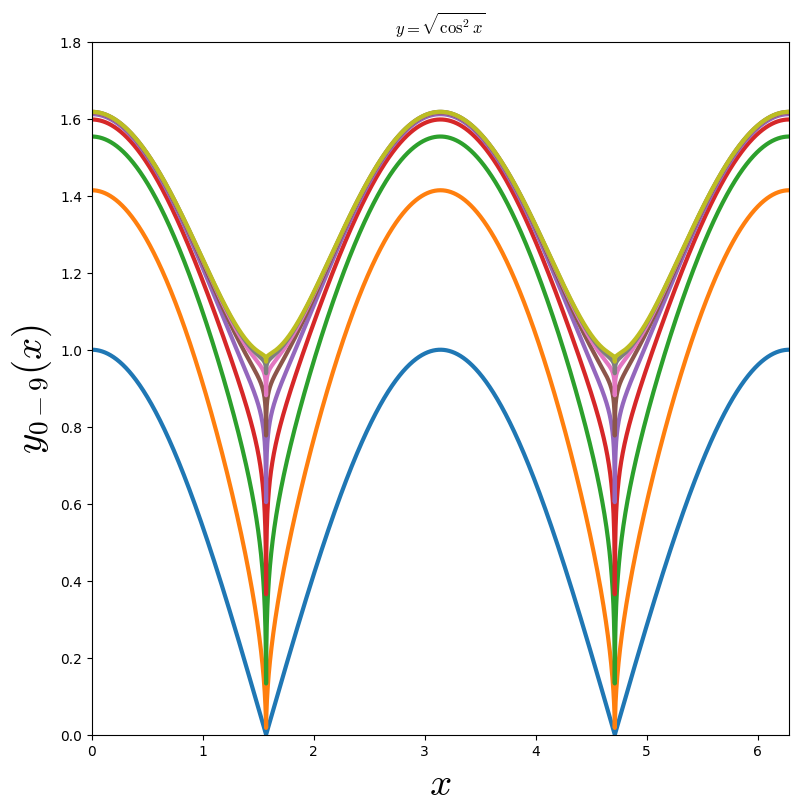

In [43]:
from numpy import linspace,cos,sin,arccos,pi,abs,sqrt
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def yn(x,k):
  if k==0:
    yn1=abs(cos(x))
  else:
    yn1=sqrt(cos(x)**2+yn(x,k-1))
  return yn1
def str_yn(x,k):
  if k==0:
    yn = '\sqrt{\cos^2x}'
  else:
    yn = '\sqrt{\cos^2x+'+str_yn(x,k-1)+'}'
  return yn

Nf=10
clst = list(cm.tab10.colors) #colors of lines
# print(yn(pi/2,3))
x = linspace(0,2*pi,5000)
yn_lst = [abs(cos(x))]
[yn_lst.append(yn(x,i)) for i in range(1,Nf)]
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_subplot(111,xlim=(0,2*pi),ylim=(0,1.8))
ax.set_xlabel('$x$',size=28)
ax.set_ylabel('$y$',size=28)
lines=[ax.plot([],[],lw=3,c=clst[i%len(clst)])[0] for i in range(len(yn_lst))]
def animate(ii):
  # ii=2*Nf
  i=ii%Nf
  k=ii//Nf
  if k==0:
    ax.set_title("$y="+str_yn(x,i)+'$',size=12)
    lines[i-1].set_data([],[])
    lines[i].set_data(x,yn_lst[i])
  else:
    if i==0:
      ax.set_title('$y_n(x)=\sqrt{\cos^2x+y_{n-1}(x)},\ y_0(x)=\sqrt{\cos^2x}$',size=25)
      ax.set_ylabel('$y_{0-9}(x)$',size=28)
    [lines[j].set_data(x[:(i+1)*len(x)//Nf],yn_lst[j][:(i+1)*len(x)//Nf]) for j in range(Nf)]
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*2, interval=50)
anim.save("sqrt_cos.mp4", writer=animation.FFMpegWriter(fps=1), dpi = 300)